In [37]:
import scanpy as sc
import scvelo as scv
import os
from anndata import AnnData as ad

Read dataset 

In [30]:
adata = scv.datasets.pbmc68k("../datasets/raw/pbmc68k.h5ad")

Save counts 

In [31]:
adata.layers["X_counts"] = adata.X.copy()

HVG selection

In [32]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=True,
)

Preprocess

In [33]:
sc.pp.log1p(adata)

In [34]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

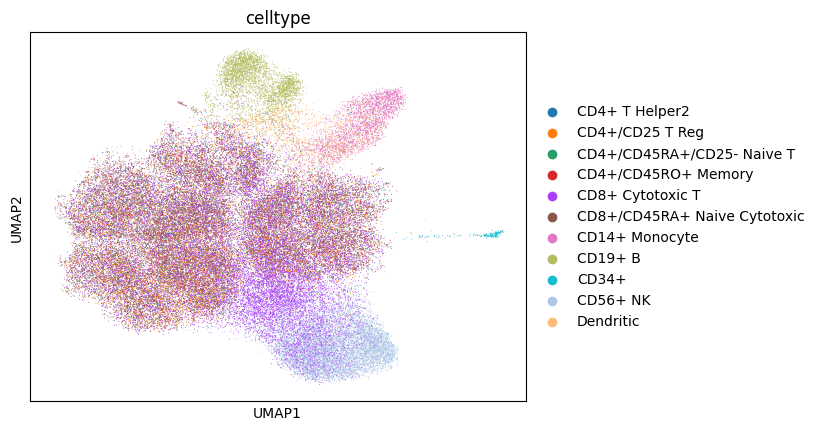

In [35]:
sc.pl.umap(adata, color=["celltype"])

Save

In [38]:
ad.write_h5ad(adata, "../datasets/processed/pbmc68k.h5ad")